In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_pickle('./processed-data.pkl')

X = df.drop(['outcome'], axis=1).values
y = df['outcome'].values

In [3]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split

from sklearn.kernel_approximation import Nystroem
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier

models = []
scoring = 'recall_macro'#'accuracy'

models.append(('XGB', XGBClassifier(use_label_encoder=False, verbosity=0, objective="multi:softprob")))
models.append(('XT', ExtraTreesClassifier()))
models.append(('KN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('MLP', MLPClassifier()))
models.append(('LSVC', LinearSVC()))
models.append(('SGD', SGDClassifier()))

In [4]:
results = []
names = []

for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=StratifiedKFold(n_splits = 5, shuffle = True), scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGB: 0.615028 (0.006094)
XT: 0.633164 (0.007429)
KN: 0.557051 (0.018630)
GNB: 0.446133 (0.009471)
RF: 0.632385 (0.009584)
DT: 0.635926 (0.009370)
MLP: 0.519539 (0.014938)
C:\Python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Python38\lib\site-packages\skl

In [9]:
fresults = []
fnames = []

for i in range(len(names)):
    if results[i].mean() > 0.45:
        fnames.append(names[i])
        fresults.append(results[i])

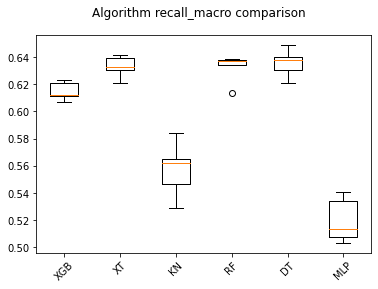

In [10]:
# boxplot algorithm comparison

fig = plt.figure()
fig.suptitle('Algorithm ' + scoring + ' comparison')
ax = fig.add_subplot(111)
plt.boxplot(fresults)
ax.set_xticklabels(fnames, rotation = 45)
plt.show()

In [29]:
time_results = []
time_names = []

for name, model, X_data in models:
    X_train, X_test, y_train, y_test = train_test_split(X_data, y, stratify=y, test_size=0.2, random_state=0)
    t_start = time.perf_counter()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    t_total = time.perf_counter() - t_start
    time_results.append(t_total)
    time_names.append(name)
    msg = "%s: %f" % (name, t_total)
    print(msg)

XGB: 106.015050
XT: 221.471089
KN: 318.051700
GNB: 2.242548
RF: 90.072395
DT: 5.115139
MLP: 196.008559
C:\Python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
LSVC: 189.677508
LSVC-N: 69.455426
SGD: 227.680120
SGD-N: 5.724927
XGB: 99.241549
XT: 200.092398
KN: 307.686308
GNB: 2.233765
RF: 91.211388
DT: 5.032690
MLP: 156.713745
C:\Python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
LSVC: 186.831775
LSVC-N: 69.310864
SGD: 247.807725
SGD-N: 5.886846


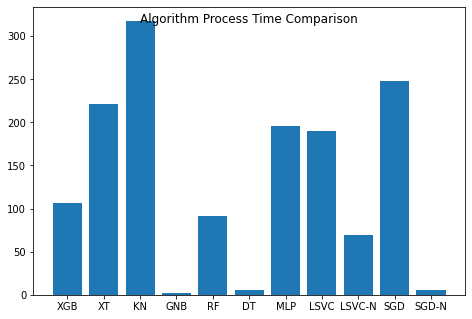

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig.suptitle('Algorithm Process Time Comparison')
ax.bar(time_names, time_results)
plt.show()